In [1]:
import geopandas as gpd
import os

In [28]:
path = r'T:\Data\CENSUS\TIGER\Lane'

In [23]:
def get_tiger_shp(year=2013, export=False):
    if year == 2010:
        bg_shp = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER"+str(year)+"/BG/"+str(year)+"/tl_"+str(year)+"_41039_bg10.zip")
        bg_shp.rename(columns={'GEOID10': 'GEOID'}, inplace = True)
        bg_data = bg_shp[['GEOID', 'geometry']]
        
    else:
        bg_shp = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER"+str(year)+"/BG/tl_"+str(year)+"_41_bg.zip")
        bg_data = bg_shp[bg_shp.COUNTYFP=='039'][['GEOID', 'geometry']]
    
    if export:
        bg_data.to_file(os.path.join(path, 'Lane_BlockGroup_'+str(year)+'.shp'))
        
    return bg_data

In [24]:
bg_data = get_tiger_shp()

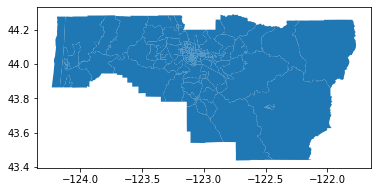

In [25]:
bg_data.plot();

In [29]:
MPObd = gpd.read_file("X:/Data/Transportation/MPO_Bound.shp")

In [1]:
for year in range(2013, 2022):
    #res = get_tiger_shp(year=year, export=True)
    bg = gpd.read_file(os.path.join(path, 'Lane_BlockGroup_'+str(year)+'.shp'))
    bg = bg.to_crs(epsg=3857)
    bg["area_bg"] = bg['geometry'].area/ 10**6
    bg_cl = gpd.clip(bg, MPObd)
    bg_cl["area"] = bg_cl['geometry'].area/ 10**6
    bg_cl["PctInside"] = bg_cl["area"] / bg_cl["area_bg"]
    df = bg_cl[["GEOID", "PctInside"]]
    df.to_csv(os.path.join(path, 'blockgroup_in_mpo_'+str(year)+'.csv'), index=False)
    bg_cl.to_file(os.path.join(path, 'MPO_blockgroup'+str(year)+'.shp'))
    #print(year)